# Video game Random Forest - resample - EU from NA and JP
This notebook uses a Random Forest ML model to predict EU Sales based on Platform, Genre, NA_Sales, and JP_Sales. The notebook sets the threshold for EU_Sales to some value independent of the median value of EU_Sales and investigates oversampling, undersampling, and combination sampling to balance the yes/no values for EU_Sales. The data is limited by setting a lower sales threshold.

In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## Read in data and remove unnecessary columns

In [2]:
# Import data
path = "resources/vgsales.csv"
vg_sales_df = pd.read_csv(path)
vg_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
vg_sales_df.shape

(16598, 11)

In [4]:
include_sales_threshold = 0.13
vg_sales_df[vg_sales_df["Global_Sales"] < include_sales_threshold].count()

Rank            6940
Name            6940
Platform        6940
Year            6817
Genre           6940
Publisher       6911
NA_Sales        6940
EU_Sales        6940
JP_Sales        6940
Other_Sales     6940
Global_Sales    6940
dtype: int64

In [5]:
# Drop rows where Global_Sales < include_sales_threshold
vg_sales_df = vg_sales_df[vg_sales_df.Global_Sales > include_sales_threshold]

In [6]:
vg_sales_df.shape

(9329, 11)

In [7]:
vg_sales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
# Drop columns
vg_sales_df.drop(["Name", "Year", "Publisher", "Other_Sales", "Global_Sales"], axis=1, inplace=True)
vg_sales_df.set_index("Rank", inplace=True)
vg_sales_df.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales
Rank,,,,,
1,Wii,Sports,41.49,29.02,3.77
2,NES,Platform,29.08,3.58,6.81
3,Wii,Racing,15.85,12.88,3.79
4,Wii,Sports,15.75,11.01,3.28
5,GB,Role-Playing,11.27,8.89,10.22


In [9]:
test_platform = vg_sales_df.groupby(['Platform']).sum()
test_platform

,NA_Sales,EU_Sales,JP_Sales
Platform,,,
2600,90.34,5.46,0.00
3DS,74.79,56.26,88.08
DC,5.43,1.69,6.59
DS,347.66,189.30,153.76
GB,114.32,47.82,84.54
GBA,174.38,70.46,45.28
GC,121.47,35.64,20.32
GEN,19.27,5.52,1.84
N64,135.01,40.16,33.38


In [10]:
test_genre = vg_sales_df.groupby(['Genre']).sum()
test_genre

,NA_Sales,EU_Sales,JP_Sales
Genre,,,
Action,843.24,508.42,137.78
Adventure,94.40,58.12,30.47
Fighting,215.55,98.20,77.80
Misc,386.33,208.95,93.02
Platform,434.09,196.96,128.71
Puzzle,112.31,47.71,54.92
Racing,341.08,229.87,54.61
Role-Playing,317.48,183.14,330.56
Shooter,565.68,305.82,34.71


In [11]:
vg_sales_df["NA_Sales"].sum()

4199.630000000001

In [12]:
# Get unique Platform values
vg_sales_df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16'],
      dtype=object)

In [13]:
# Make sure there are no null values
vg_sales_df["Platform"].isnull().sum()

0

In [14]:
# Get unique Genre values
vg_sales_df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [15]:
# Make sure there are no null values
vg_sales_df["Genre"].isnull().sum()

0

In [16]:
# Make sure sales columns do not have null values
print(f"NA_Sales has {vg_sales_df['NA_Sales'].isnull().sum()} null values.")
print(f"EU_Sales has {vg_sales_df['EU_Sales'].isnull().sum()} null values.")
print(f"JP_Sales has {vg_sales_df['JP_Sales'].isnull().sum()} null values.")

NA_Sales has 0 null values.
EU_Sales has 0 null values.
JP_Sales has 0 null values.


In [17]:
# Write reduced df to csv
# vg_sales_df.to_csv('resources/vgsales_reduced_NA_and_EU.csv')

## Histogram of Sales Data

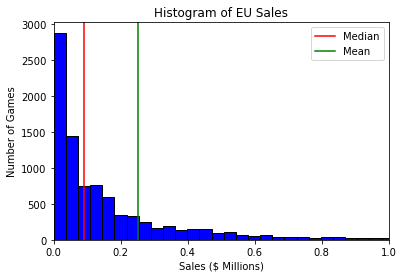

The median sales for EU is $0.09 Million


In [18]:
# Create Histogram to view NA Sales distribution
plt.hist(vg_sales_df['EU_Sales'], color = 'blue', edgecolor = 'black',
         bins = 800)
plt.title('Histogram of EU Sales')
plt.xlabel('Sales ($ Millions)')
plt.ylabel('Number of Games')
plt.xlim(left=0, right=1)
plt.axvline(vg_sales_df['EU_Sales'].median(),label="Median",color='red')
plt.axvline(vg_sales_df['EU_Sales'].mean(),label="Mean",color='green')
plt.legend()
plt.show()

print(f"The median sales for EU is ${round(vg_sales_df['EU_Sales'].median(),3)} Million")

## Categorize Other_Sales Column

In [19]:
# Copy vg_sales_df
categorize_eu_sales = vg_sales_df.filter(["EU_Sales"], axis=1)
categorize_eu_sales

,EU_Sales
Rank,
1,29.02
2,3.58
3,12.88
4,11.01
5,8.89
...,...
9326,0.03
9327,0.00
9328,0.00


## Set Threshold Sales Number

In [20]:
# Set threshold sales number
# na_sales_threshold = round(sales_data_nrm['NA_Sales'].median(),3)
eu_sales_threshold = 0.2

In [21]:
# Reassign NA_sales value
for index,row in categorize_eu_sales.iterrows():
    
    # NA Sales
    if row.EU_Sales > eu_sales_threshold:
        categorize_eu_sales.loc[index] = 1
    else:
        categorize_eu_sales.loc[index] = 0

eu_sales_col_name = "EU_Sales_gt_" + str(eu_sales_threshold)
categorize_eu_sales.\
    rename(columns={"EU_Sales": eu_sales_col_name}, inplace=True)

categorize_eu_sales.head()

,EU_Sales_gt_0.2
Rank,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0


In [22]:
# Write categorized df to csv file
# output_file_str = "EU_Sales_nrm_thresh_" + \
#     str(eu_sales_threshold).split(".")[0] + "p" + str(eu_sales_threshold).split(".")[1] + ".csv"
# categorize_eu_sales.to_csv('resources/' + output_file_str)

## Separate Sales Data for NA and JP

In [23]:
sales_data = vg_sales_df.filter(["NA_Sales", "JP_Sales"], axis=1)
sales_data.head()

,NA_Sales,JP_Sales
Rank,,
1,41.49,3.77
2,29.08,6.81
3,15.85,3.79
4,15.75,3.28
5,11.27,10.22


In [24]:
# Create platform df
platform_df = vg_sales_df.filter(["Platform"], axis=1)
platform_df.head()

,Platform
Rank,
1,Wii
2,NES
3,Wii
4,Wii
5,GB


## Encode Platform data

In [25]:
# Encode platform df
platform_encoded_df = pd.get_dummies(platform_df)
platform_encoded_df.head()

,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_N64,Platform_NES,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
Rank,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Get shape of platform_encoded_df
platform_encoded_df.shape

(9329, 28)

In [27]:
# Write encoded platform data to CSV
# platform_encoded_df.to_csv('resources/encoded_platform.csv')

## Encode Genre data

In [28]:
# Create genre df
genre_df = vg_sales_df.filter(["Genre"], axis=1)
genre_df.head()

,Genre
Rank,
1,Sports
2,Platform
3,Racing
4,Sports
5,Role-Playing


In [29]:
# Encode genre df
genre_encoded_df = pd.get_dummies(genre_df)
genre_encoded_df.head()

,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
Rank,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,0,0


In [30]:
# Get shape of genre_encoded_df
genre_encoded_df.shape

(9329, 12)

In [31]:
# Write encoded genre data to CSV
# genre_encoded_df.to_csv('resources/encoded_genre.csv')

## Combine dataframes for analysis

In [32]:
# Combine dataframes to create sales_df_encoded
sales_df_encoded = categorize_eu_sales.join(sales_data, how='outer').\
    join(platform_encoded_df, how='outer').join(genre_encoded_df, how='outer')
sales_df_encoded.head()

,EU_Sales_gt_0.2,NA_Sales,JP_Sales,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
Rank,,,,,,,,,,,,,,,,,,,,,
1,1.0,41.49,3.77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,29.08,6.81,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,15.85,3.79,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,15.75,3.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1.0,11.27,10.22,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
# Create smaller df of 100 rows selected randomly from larger dataset
# sales_reduced = sales_df_encoded.sample(n=9000)
# sales_reduced.head()

sales_reduced = sales_df_encoded.copy()
sales_reduced.head()

,EU_Sales_gt_0.2,NA_Sales,JP_Sales,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
Rank,,,,,,,,,,,,,,,,,,,,,
1,1.0,41.49,3.77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,29.08,6.81,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,15.85,3.79,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,15.75,3.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1.0,11.27,10.22,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
# Drop the index
sales_reduced_no_idx = sales_reduced.reset_index(drop=True)
sales_reduced_no_idx.head()

,EU_Sales_gt_0.2,NA_Sales,JP_Sales,Platform_2600,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,1.0,41.49,3.77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,29.08,6.81,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,15.85,3.79,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,15.75,3.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,11.27,10.22,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Perform ML with Logistic Regression

In [35]:
# Count True/False NA_Sales numbers
sales_reduced_no_idx[eu_sales_col_name].value_counts()

0.0    6669
1.0    2660
Name: EU_Sales_gt_0.2, dtype: int64

In [36]:
# Set X and y data
y = sales_reduced_no_idx[eu_sales_col_name]
X = sales_reduced_no_idx.drop(columns=eu_sales_col_name)

In [37]:
# Split data into training and testing data
from collections import Counter
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
# X_train.shape
Counter(y_train)

Counter({0.0: 5001, 1.0: 1995})

In [38]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# # Fit the Standard scaler with the training data
X_scaler = scaler.fit(X_train)

# # Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Oversample data

Random Oversampling

In [39]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

Counter(y_resampled)

Counter({0.0: 5001, 1.0: 5001})

In [40]:
# Create a RF model
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=128, random_state=1)

In [41]:
# Train the model
# classifier.fit(X_train, y_train)
classifier_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=128, random_state=1)

In [42]:
y_pred = classifier_rf.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,1.0
5,0.0,0.0
6,0.0,0.0
7,1.0,1.0
8,0.0,0.0
9,0.0,0.0


In [43]:
# Assess accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8405486498071153


In [44]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.8170543264636412

In [45]:
# # Print confusion matrix
# from sklearn.metrics import confusion_matrix, classification_report
# matrix = confusion_matrix(y_test, y_pred)
# print(matrix)

# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual < threshold", "Actual > threshold"], 
        columns=["Predicted < threshold", "Predicted > threshold"])

cm_df

,Predicted < threshold,Predicted > threshold
Actual < threshold,1454,214
Actual > threshold,158,507


In [46]:
# Print classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      1668
         1.0       0.70      0.76      0.73       665

    accuracy                           0.84      2333
   macro avg       0.80      0.82      0.81      2333
weighted avg       0.85      0.84      0.84      2333



In [47]:
print('Train Score: ', classifier_rf.score(X_resampled, y_resampled))  
print('Test Score: ', classifier_rf.score(X_test, y_test)) 

Train Score:  0.9742051589682064
Test Score:  0.287183883411916


In [48]:
# Look at feature importance
# importances = classifier_rf.feature_importances_
# importances

In [49]:
# Sort the features by their importance.
# sorted(zip(classifier_rf.feature_importances_, X.columns), reverse=True)